In [25]:
import os
import numpy
import numpy as np
import pickle
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
from matplotlib import cm 

In [26]:
def get_label(filename):
    lab=int(filename.split("_")[2][0])
    return lab

In [27]:
def pre_process_data(raw_data):
    raw_data=raw_data.replace('[',"")
    raw_data=raw_data.replace(']',"")
    raw_data=raw_data.replace('\n',"")
    raw_data=raw_data.split(",")
    return raw_data

In [28]:
def align_data_xyz(raw_data):
    length=len(raw_data)
    i=0
    data=[]
    while i<length:
        data_2=[]
        for j in range(i,i+3):
            data_2.append(float((raw_data)[j]))
        data.append(data_2)
        i=i+3
    return data

In [29]:
def align_window(data):
    length=len(data)
    i=0
    data_refined=[]
    while i<length:
        data_2=[]
        for j in range(i,i+31):
            data_2.append((data)[j])
        data_refined.append(data_2)
        i=i+31
    return (data_refined)
    

In [30]:
def differentiation(data_refined):
    for i in range(0,len(data_refined)):
        for x in range(0,len(data_refined[i])-1):
            data_refined[i][x][0]=int(abs(data_refined[i][x+1][0]-data_refined[i][x][0])*100)
            data_refined[i][x][1]=int(abs(data_refined[i][x+1][1]-data_refined[i][x][1])*100)
            data_refined[i][x][2]=int(abs(data_refined[i][x+1][2]-data_refined[i][x][2])*100)
        data_refined[i].remove(data_refined[i][30])
    return (data_refined)

In [31]:
def scatterplot(ref_data,label):
    X=[]
    Y=[]
    Z=[]
    for val in ref_data:
        for v in val:
            X.append(v[0])
            Y.append(v[1])
            Z.append(v[2])
    X=np.array(X)
    Y=np.array(Y)
    Z=np.array(Z)
    cmhot = plt.get_cmap("hot")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X, Y, Z,c=Z,cmap=cmhot)
    plt.title(label)
    #ax.plot_trisurf(X, Y, Z,  cmap = cmhot) 

In [32]:
def create_data(path):
    Dataset=list()
    for filename in os.listdir(path):
        f = open(os.path.join(path,filename), "r")
        raw_data=f.read()
        lab=get_label(filename)
        raw_data=pre_process_data(raw_data)
        data=align_data_xyz(raw_data)
        ref_data=align_window(data)
        scatterplot(ref_data,filename.split(".")[0]+" before processing")
        processed_data=differentiation(ref_data)
        scatterplot(processed_data,filename.split(".")[0]+" after processing")
        for samples in processed_data:
            Dataset.append([samples,lab])
    return Dataset

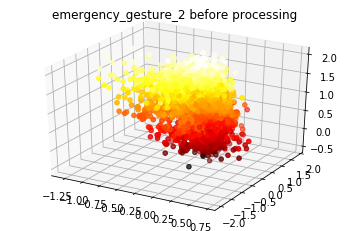

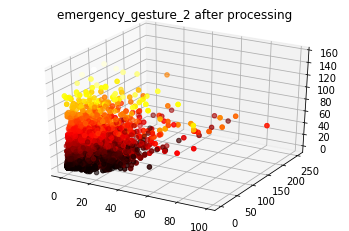

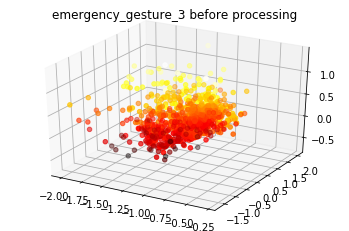

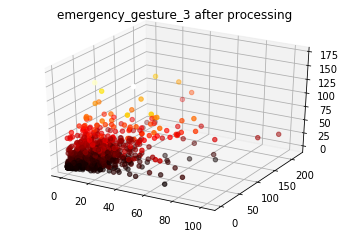

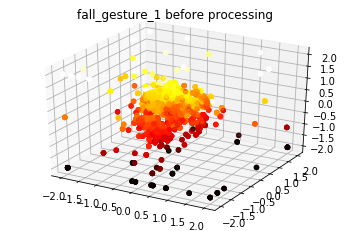

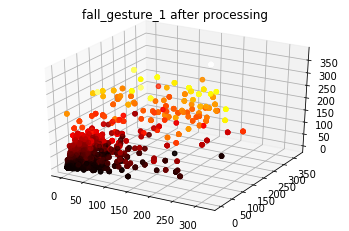

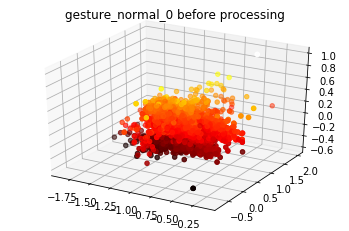

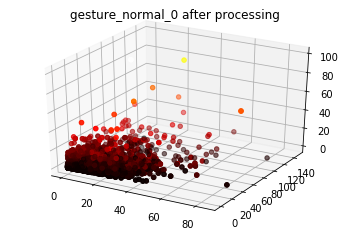

In [33]:
Dataset=create_data('raw_data')

In [34]:
pickle_out=open("Dataset.pickle","wb")
pickle.dump(Dataset,pickle_out)
pickle_out.close()

## Visualizations on data

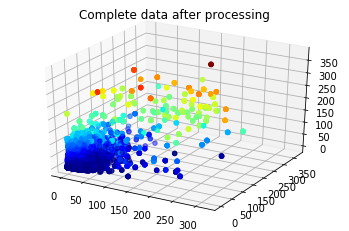

In [35]:
X=[]
Y=[]
Z=[]
for data,lab in Dataset:
    for v in data:
        X.append(v[0])
        Y.append(v[1])
        Z.append(v[2])
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
cmhot = plt.get_cmap("hot")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z,c=Z,cmap=cm.jet)  
plt.title("Complete data after processing")
plt.show()

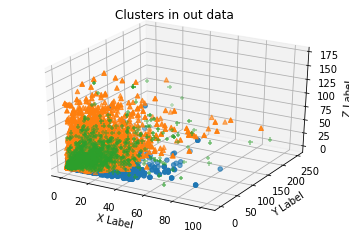

In [41]:
#Show clusters in data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X=[]
Y=[]
Z=[]
for data,lab in Dataset:
    if lab==0:
        m='o'
        for v in data:
            X.append(v[0])
            Y.append(v[1])
            Z.append(v[2])
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
ax.scatter(X, Y, Z, marker=m)

X=[]
Y=[]
Z=[]
for data,lab in Dataset:
    if lab==1:
        m='*'
        for v in data:
            X.append(v[0])
            Y.append(v[1])
            Z.append(v[2])
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
ax.scatter(X, Y, Z, marker=m)

X=[]
Y=[]
Z=[]
for data,lab in Dataset:
    if lab==2:
        m='^'
        for v in data:
            X.append(v[0])
            Y.append(v[1])
            Z.append(v[2])
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
ax.scatter(X, Y, Z, marker=m)

X=[]
Y=[]
Z=[]
for data,lab in Dataset:
    if lab==3:
        m='+'
        for v in data:
            X.append(v[0])
            Y.append(v[1])
            Z.append(v[2])
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
ax.scatter(X, Y, Z, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Clusters in out data")
plt.show()